Ce cahier numérique est à disposition sous licence CC-BY-NC-SA. Il a été écrit par Martin Vérot pour les étudiants en L3 de l'ENS de Lyon au sein du département Sciences de la matière. Cette activité vient en complément du [polycopié de cours](http://agregationchimie.free.fr/cours.php#incertitudes).


# Limite de détection (LOD)

In [91]:
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt


#intervalle de confiance souhaité
C = 0.99
alpha = 1-C
seuil = 1-2*alpha
#écart-type sur les mesures
blanks=np.array([-7.13e-03,-5.30e-05,5.02e-03,-4.68e-03,0.30e-02,-6.10e-03,1.00e-02])
samples = np.array([0.0246,0.0170,0.0216,0.0105,0.0159,0.0141,0.027])
#nb de points utilisés pour faire les mesures
n=samples.size
#cofficient de student pour l'intervalle de confiance souhaité
tLOD = stats.t.interval(seuil, n-1, loc=0, scale=1)[1]

#calcul de l'écart type et de la moyenne des échantillons
sigmaSamples = np.std(samples,ddof=1)
avgSamples = np.average(samples)
#calcul de la valeur moyenne du blanc
blank = np.average(blanks)
#calcul de la limite de détection
LOD = blank+tLOD*sigmaSamples

print('blanc              {:.3e}'.format(blank))
print('sigma mesures      {:.3e}'.format(sigmaSamples))
print('facteur de student {:.3e}'.format(tLOD))
print('LOD                {:.3e}'.format(LOD))



blanc              8.143e-06
sigma mesures      5.933e-03
facteur de student 3.143e+00
LOD                1.865e-02


## Limite de détection et asymétrie

[]

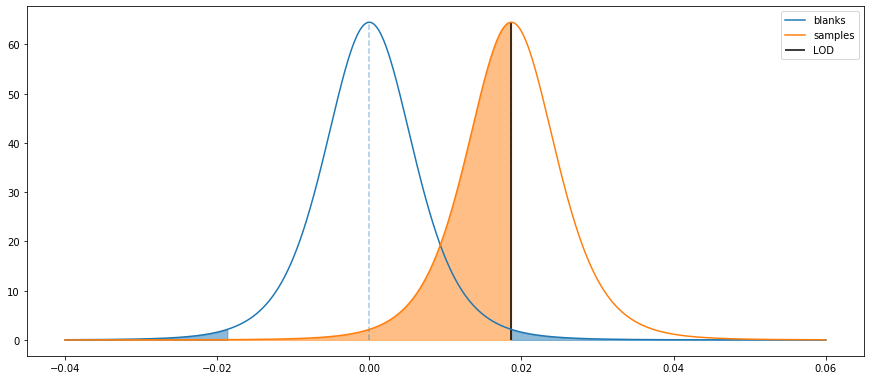

In [98]:
#figure
fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(3, 1,hspace=0.25)
ax1 = fig.add_subplot(gs[0:2,0])


xs = np.linspace(-0.04,0.06,1001)
#courbe de student pour le blanc en prenant pour écart-type celui des points mesurés
ax1.plot(xs,stats.t.pdf(xs,n-1,loc=blank,scale=sigmaSamples),label='blanks')
#courbe de student pour les points mesurés en prenant pour écart-type celui des points mesurés
ax1.plot(xs,stats.t.pdf(xs,n-1,loc=avgSamples,scale=sigmaSamples),label='samples')


#max de la distribution
maxF = stats.t.pdf([avgSamples],n-1,loc=avgSamples,scale=sigmaSamples)
#valeurs les plus probables
ax1.vlines(blank,0,maxF,color='C0',ls='--',alpha=0.4)
ax1.vlines(avgSamples,0,maxF,color='C1',ls='--',alpha=0.4)
ax1.vlines(LOD,0,maxF,ls='-',alpha=1,label='LOD',color='#000000')

#tracé des deux aires correspondant à la probabilité d'avoir un échantillon sans analyté
#Il y a 1% à gauche et à droite, mais nous, c'est seulement la branche droite (valeur supérieure au blanc) 
#qui nous intéresse on a bien pris un facteur de student pour 98% alors que le seuil de confiance souhaité est de 
#99%

#avec un valeur mesurée au delà de la limite de détection
xs = np.linspace(blank+tLOD*sigmaSamples,0.06,1001)
ax1.fill_between(xs, stats.t.pdf(xs,n-1,loc=blank,scale=sigmaSamples), 0,color='C0',alpha=0.5)
xs = np.linspace(-0.04,blank-tLOD*sigmaSamples,1001)
ax1.fill_between(xs, stats.t.pdf(xs,n-1,loc=blank,scale=sigmaSamples), 0,color='C0',alpha=0.5)

xs = np.linspace(-0.04,LOD,1001)
ax1.fill_between(xs, stats.t.pdf(xs,n-1,loc=LOD,scale=sigmaSamples), 0,color='C1',alpha=0.5)
ax1.legend()
plt.plot()

On peut voir que pour un échantillon dont la valeur la plus probable est à la limite de détection, il y a moins de 1% de chance d'être au-delà pour la valeur la plus probable (aire bleue à droite). Mais en pratique, cela veut dire que la moitié du temps (aire en orange) un échantillon qui contient **réellement** de l'analyte est considéré comme en dessous de la limite de détection. 

Autrement dit, pour un échantillon à la limite de détection, pour une unique mesure, la conclusion est fausse une fois sur 2.

# Limite de quantification (LOQ)

Avec les mêmes résultats que précédemment, on va montrer l'intérêt de la limite de quantification.

[]

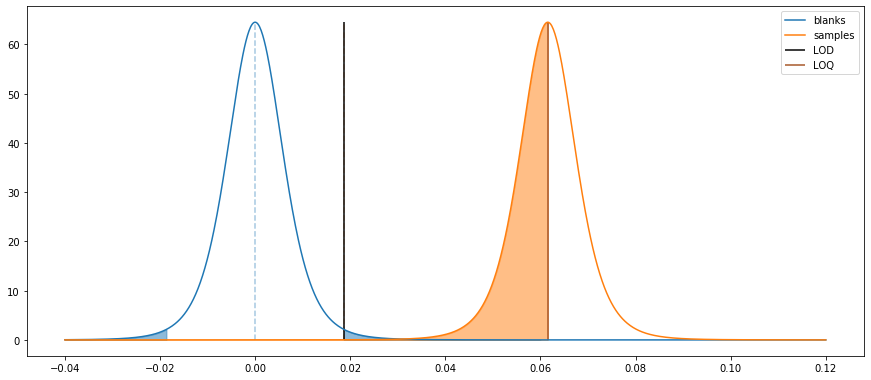

In [100]:
LOQ = blank+3.3*tLOD*sigmaSamples

#figure
fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(3, 1,hspace=0.25)
ax1 = fig.add_subplot(gs[0:2,0])


xs = np.linspace(-0.04,0.12,1001)
#courbe de student pour le blanc en prenant pour écart-type celui des points mesurés
ax1.plot(xs,stats.t.pdf(xs,n-1,loc=blank,scale=sigmaSamples),label='blanks')
#courbe de student pour un mesure effectuée à la limite de quantification
ax1.plot(xs,stats.t.pdf(xs,n-1,loc=LOQ,scale=sigmaSamples),label='samples')


#max de la distribution
maxF = stats.t.pdf([avgSamples],n-1,loc=avgSamples,scale=sigmaSamples)
#valeurs les plus probables
ax1.vlines(blank,0,maxF,color='C0',ls='--',alpha=0.4)
ax1.vlines(avgSamples,0,maxF,color='C1',ls='--',alpha=0.4)
ax1.vlines(LOD,0,maxF,ls='-',alpha=1,label='LOD',color='#000000')
ax1.vlines(LOQ,0,maxF,ls='-',alpha=1,label='LOQ',color='#a65628')

#tracé des deux aires correspondant à la probabilité d'avoir un échantillon sans analyté
#Il y a 1% à gauche et à droite, mais nous, c'est seulement la branche droite (valeur supérieure au blanc) 
#qui nous intéresse on a bien pris un facteur de student pour 98% alors que le seuil de confiance souhaité est de 
#99%

#avec un valeur mesurée au delà de la limite de détection
xs = np.linspace(blank+tLOD*sigmaSamples,0.06,1001)
ax1.fill_between(xs, stats.t.pdf(xs,n-1,loc=blank,scale=sigmaSamples), 0,color='C0',alpha=0.5)
xs = np.linspace(-0.04,blank-tLOD*sigmaSamples,1001)
ax1.fill_between(xs, stats.t.pdf(xs,n-1,loc=blank,scale=sigmaSamples), 0,color='C0',alpha=0.5)

xs = np.linspace(-0.04,LOQ,1001)
ax1.fill_between(xs, stats.t.pdf(xs,n-1,loc=LOQ,scale=sigmaSamples), 0,color='C1',alpha=0.5)
ax1.legend()
plt.plot()

On peut voir que cette fois-ci, même à la limite de quantification, il y a une très faible probabilité pour affirmer de manière erronée qu'il y a un analyte alors que c'est faux (l'aire orange est quasiment nulle en dessous de la limite de détection)